In [1]:
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

from bayes import GaussianNaiveBayes, CategoricalNaiveBayes, MultinomialNaiveBayes

# Size of plots
plt.rcParams["figure.figsize"] = (13,9)

In [2]:
def plot_errors(ns: list[int], clfs: dict[str, GaussianNaiveBayes | CategoricalNaiveBayes]):
    clf_train_error = [clfs[f'{n}'].train_error for n in ns]
    clf_val_error = [clfs[f'{n}'].val_error for n in ns]
    clf_test_error = [clfs[f'{n}'].test_error for n in ns]


    plt.plot(ns, clf_train_error, label="train", linestyle="--")
    plt.plot(ns, clf_val_error, label="validacion", linestyle="-.")
    plt.plot(ns, clf_test_error, label="test", linestyle="-")
    plt.legend()
    plt.show()


# Ejercicio 1

In [3]:
# Cargamos la redes del TP 2
d_vals = [2, 4, 8, 16, 32]

redes_diag_train_error: list[float]
redes_diag_test_error: list[float]
redes_paral_train_error: list[float]
redes_paral_test_error: list[float]

with open(f'errors-dimensionalidad/diag.pkl', 'rb') as file:
    _errors = pickle.load(file)
    redes_diag_train_error = _errors['train']
    redes_diag_test_error = _errors['test']
    
with open(f'errors-dimensionalidad/paral.pkl', 'rb') as file:
    _errors = pickle.load(file)
    redes_paral_train_error = _errors['train']
    redes_paral_test_error = _errors['test']

# Creamos los errores de los arboles
from sklearn.tree import DecisionTreeClassifier
from diagonal_paralelo import create_points_diagonal, create_points_paralelo

# Datos Diagonal

tree_diag_error_train = []
tree_diag_error_test = []

for d in d_vals:
    df_test = create_points_diagonal(d, 10000, .78)

    error_train_ = 0
    error_test_ = 0
    for _ in range(20):
        df_train = create_points_diagonal(d, 250, .78)

        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf.fit(df_train.loc[:,range(d)], df_train.loc[:,"CLASS"])

        error_train_ += (1-accuracy_score(df_train.loc[:,"CLASS"], clf.predict(df_train.loc[:,range(d)])))
        
        pred = clf.predict(df_test.loc[:,range(d)])
        error_test_ += (1-accuracy_score(df_test.loc[:,"CLASS"], pred))
    
    # Calculamos mean de cada valor
    tree_diag_error_train.append(error_train_/20)
    tree_diag_error_test.append(error_test_/20)

tree_paral_error_train = []
tree_paral_error_test = []

for d in d_vals:
    df_test = create_points_paralelo(d, 10000, .78)

    error_train_ = 0
    error_test_ = 0
    for _ in range(20):
        df_train = create_points_paralelo(d, 250, .78)

        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf.fit(df_train.loc[:,range(d)], df_train.loc[:,"CLASS"])

        error_train_ += (1-accuracy_score(df_train.loc[:,"CLASS"], clf.predict(df_train.loc[:,range(d)])))
        
        pred = clf.predict(df_test.loc[:,range(d)])
        error_test_ += (1-accuracy_score(df_test.loc[:,"CLASS"], pred))

    
    # Calculamos mean de cada valor
    tree_paral_error_train.append(error_train_/20)
    tree_paral_error_test.append(error_test_/20)

In [4]:
d_vals = [2, 4, 8, 16, 32]

ej1_diag_clfs: dict[int, GaussianNaiveBayes] = {}
ej1_paral_clfs: dict[int, GaussianNaiveBayes] = {}
ej1_diag_train_errors = []
ej1_diag_test_errors = []
ej1_paral_train_errors = []
ej1_paral_test_errors = []

for d in d_vals:
    df_test = create_points_diagonal(d, 10000, .78)
    tmp: GaussianNaiveBayes | None = None
    _train_errors = 0
    _test_errors = 0

    for _ in range(20):
        df_data = create_points_diagonal(d, 250, .78)
        clf = GaussianNaiveBayes()
        clf.train(df_data.loc[:, range(d)], df_data.loc[:, 'CLASS'])
        clf.predict(df_test.copy())
        _train_errors += clf.train_error
        _test_errors += clf.test_error

        if not tmp or clf.test_error < tmp.test_error:
            tmp = clf
    
    ej1_diag_clfs[d] = tmp
    ej1_diag_train_errors.append(_train_errors/20)
    ej1_diag_test_errors.append(_test_errors/20)
    tmp.save(f'ejercicio-1/gaussianNB-diag-{d}.pkl')

for d in d_vals:
    df_test = create_points_paralelo(d, 10000, .78)
    tmp: GaussianNaiveBayes | None = None
    _train_errors = 0
    _test_errors = 0

    for _ in range(20):
        df_data = create_points_paralelo(d, 250, .78)
        clf = GaussianNaiveBayes()
        clf.train(df_data.loc[:, range(d)], df_data.loc[:, 'CLASS'])
        clf.predict(df_test.copy())
        _train_errors += clf.train_error
        _test_errors += clf.test_error

        if not tmp or clf.test_error < tmp.test_error:
            tmp = clf
    
    ej1_paral_clfs[d] = tmp
    ej1_paral_train_errors.append(_train_errors/20)
    ej1_paral_test_errors.append(_test_errors/20)
    tmp.save(f'ejercicio-1/gaussianNB-paral-{d}.pkl')

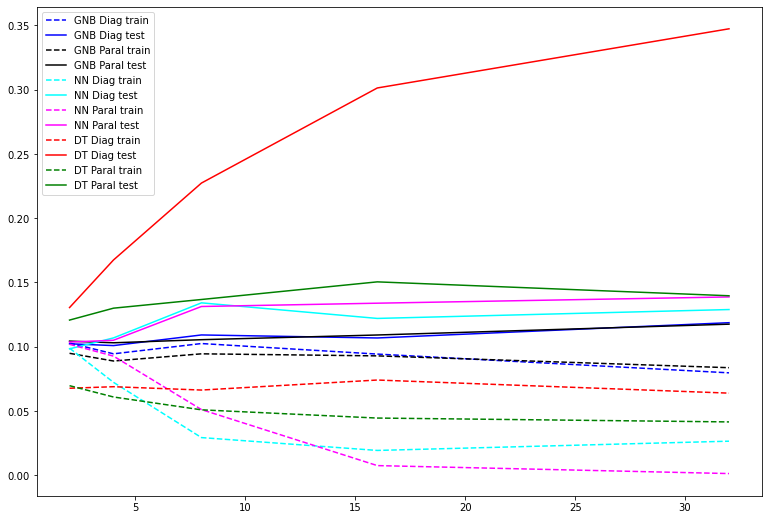

In [7]:
# Ploteamos las Gaussian Naive Bayes
plt.plot(d_vals, ej1_diag_train_errors, 'blue', label="GNB Diag train", linestyle="--")
plt.plot(d_vals, ej1_diag_test_errors, 'blue', label="GNB Diag test", linestyle="-")
plt.plot(d_vals, ej1_paral_train_errors, 'black', label="GNB Paral train", linestyle="--")
plt.plot(d_vals, ej1_paral_test_errors, 'black', label="GNB Paral test", linestyle="-")

# Ploteamos las Red Classifier
plt.plot(d_vals, redes_diag_train_error, 'cyan', label="NN Diag train", linestyle="--")
plt.plot(d_vals, redes_diag_test_error, 'cyan', label="NN Diag test", linestyle="-")
plt.plot(d_vals, redes_paral_train_error, 'magenta', label="NN Paral train", linestyle="--")
plt.plot(d_vals, redes_paral_test_error, 'magenta', label="NN Paral test", linestyle="-")

# Ploteamos los Decision Tree Classifier
plt.plot(d_vals, tree_diag_error_train, 'red', label="DT Diag train", linestyle="--")
plt.plot(d_vals, tree_diag_error_test, 'red', label="DT Diag test", linestyle="-")
plt.plot(d_vals, tree_paral_error_train, 'green', label="DT Paral train", linestyle="--")
plt.plot(d_vals, tree_paral_error_test, 'green', label="DT Paral test", linestyle="-")
plt.legend()
plt.show()

# Conclusion

Como podemos ver en la grafica, la Gaussian Naive Bayes se acercan mucho mas al error de bayes en comparacion al resto de los modelos.

A diferencia de los otros modelos, las Gassian Naive Bayes mantuvieron el error a medida que aumentamos la dimension, pero se puede aclarar que cuando aumentamos la dimension, el modelo sobreajusta un poco (pero mucho menos en comparacion a las redes y los arboles). Tambien se ve que tiene el mismo comportamiento que los otros modelos ya que mientras mas dimensiones "perdemos" cantidad de datos de entrenamiento y el modelo es menos preciso con mas dimensiones.

Por ultimo, se puede ver que los errores de la Gaussian Naive Bayes son similares (la diagonal y paralelo) y esto es algo que tambien paso con redes.

De esta forma podemos decir, hasta ahora, el mejor modelo son las Gaussian Naive Bayes para este problema ya que no pierde tanta presicion a medidad que aumentamos la dimension.

# Ejercicio 2

<AxesSubplot:xlabel='0', ylabel='1'>

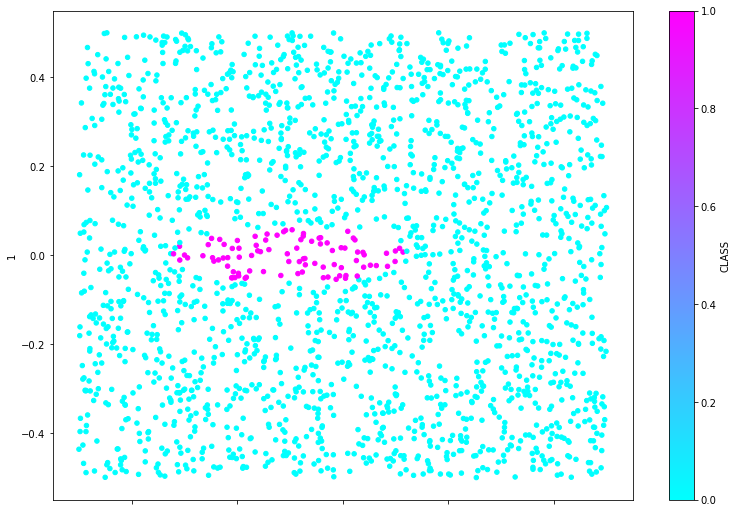

In [69]:
ej2_df_data = read_csv('dos_elipses/dos_elipses.data', names=[0, 1, 'CLASS'])
ej2_df_data = ej2_df_data.sample(500)
ej2_df_test = read_csv('dos_elipses/dos_elipses.test', names=[0, 1, 'CLASS'])

_x_train, _y_train = ej2_df_data.loc[:, [0,1]], ej2_df_data.loc[:, 'CLASS']

ej2_clf = GaussianNaiveBayes()
ej2_clf.train(_x_train, _y_train)
elipses_pred = ej2_clf.predict(ej2_df_test.copy())
elipses_pred.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')

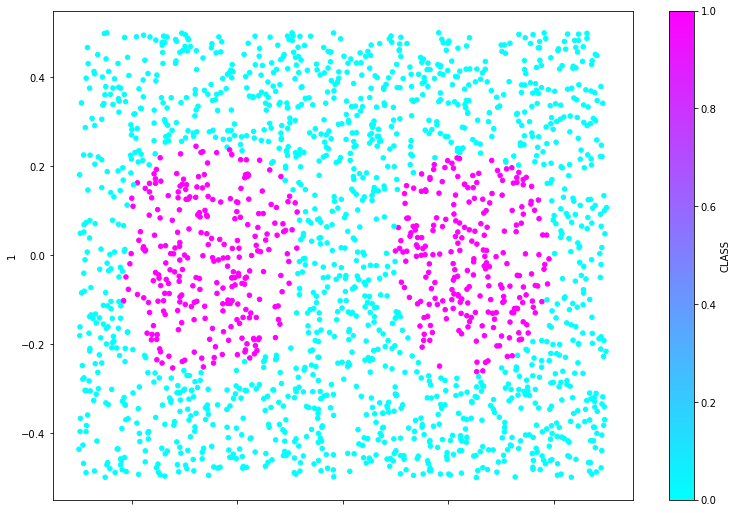

In [29]:
from redes import RedClassifier

with open('redes-ejercicio-2/red-best-elipses.pkl', 'rb') as file:
    red_elipse: RedClassifier = pickle.load(file)
    red_pred = red_elipse.predict(ej2_df_test.copy())
    red_pred.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')

In [73]:
ej2_clf.test_error

0.23950000000000005

# Conclusion

Podemos ver que este modelo no realiza una buena clasificacion. Estoy un poco confundido ya que el error de test es relativamente bajo cuando el modelo no realiza una buena clasificacion.

Unas cosas que podemos notar en el resultado del modelo NB, clasifica como clase 1 a unos puntos que rodean el 0 en el eje Y. Pienso yo que esto se debe a que en el train set, hay una alta concentracion de puntos de clase 1 al rededor de 0 en el eje Y y de esta manera tenemos una alta probabilidad de ser esta clase si el punto tiene como componente y=0.

Luego podemos concluir que este modelo no es bueno para este problema y es preferible usar redes.

<AxesSubplot:xlabel='0', ylabel='1'>

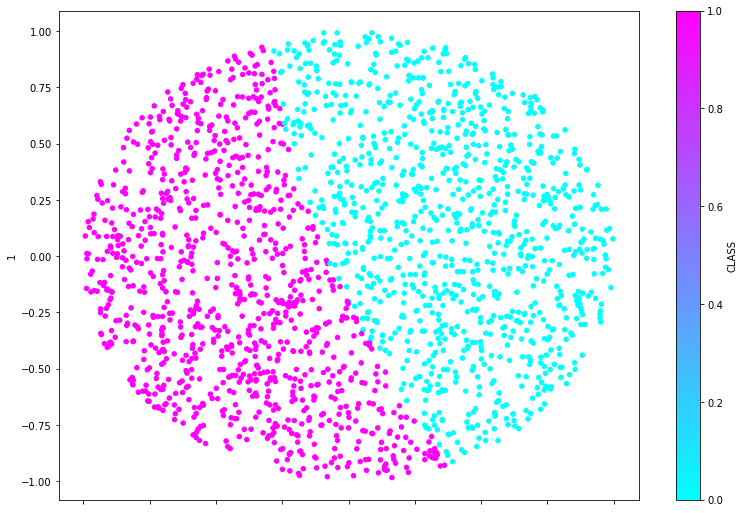

In [77]:
from espirales import generate_spirals_dataframe

ej2_df_data = generate_spirals_dataframe(600, 1)
ej2_df_test = generate_spirals_dataframe(2000, 1)

_x_train, _y_train = ej2_df_data.loc[:, [0,1]], ej2_df_data.loc[:, 'CLASS']

ej2_clf = GaussianNaiveBayes()
ej2_clf.train(_x_train, _y_train)
spiral_pred = ej2_clf.predict(ej2_df_test.copy())
spiral_pred.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')

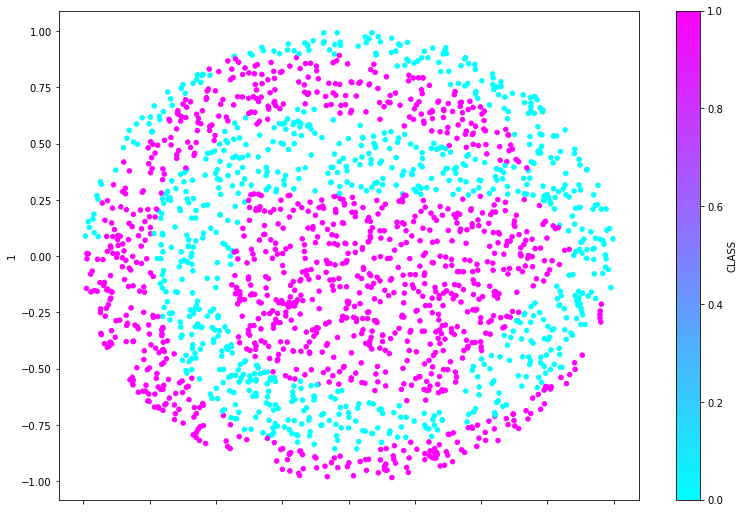

In [78]:
from redes import MLPClassifier

with open('redes-ejercicio-2/red-best-espirales.pkl', 'rb') as file:
    red_elipse: MLPClassifier = pickle.load(file)
    red_pred = red_elipse.predict(ej2_df_test.copy())
    red_pred.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')

# Conclusion

En este ejercicio podemos ver lo pesimo que predice nuestro modelo de NB en comparacion a las redes. Primero, el error de la red era aprox de 0.2 pero el modelo NB tiene un error aprox 0.5 siendo mucho peor que la red de 40 neuronas.

Como sabemos en este problema existe la misma cantidad de puntos de ambas clases (aprox) y estas clases estan distribuida de forma equitativa y esto genera que la probabilidad de pertenecer a la clase 0 o a la clase 1 sea muy similar. Esto lleva a que el modelo probabilistico clasifique de esta forma, separando el circulo por la mitad como vemos en la grafica.

(Para entender esto es bueno tener un plot bueno de los datos separados por las clases) Explicando un poco mejor lo anterior, si nosotros tomamos todos los puntos que tienen y=0 y los separamos por clases, las clases van a tener la misma cantidad de puntos y esto trae como resultado que la probabilidad de pertenecer a una clase o la otra cuando y=0 es casi la misma. Y al ser simetrico la distribucion, si variamos la componente y llegamos a la misma conclusion. Y esto lleva a tener un modelo que no clasifica bien.

Con esto podemos ver que NB no es la mejor forma de encarar el problema.

# Ejercicio 3

In [8]:
def discretizar(df_data: DataFrame, df_test: DataFrame, n_bins: list[int]) -> dict[str, CategoricalNaiveBayes]:
    clfs: dict[str, CategoricalNaiveBayes] = {'best': None}
    n_cols = len(df_data.columns)

    _x_train, _x_val, _y_train, _y_val = train_test_split(df_data.loc[:, range(n_cols-1)],
                                                          df_data.loc[:, 'CLASS'],
                                                          test_size=.2,
                                                          random_state=0)
    _x_test, _y_test = df_test.loc[:, range(n_cols-1)], df_test.loc[:, 'CLASS']

    for n in n_bins:
        clf = CategoricalNaiveBayes(n_bins=n)
        clf.train(_x_train, _y_train, _x_val, _y_val)
        clf.predict(_x_test, _y_test)

        clfs[f'{n}'] = clf

        if not clfs['best'] or clf.val_error < clfs['best'].val_error:
            clfs['best'] = clf
    
    return clfs

# Ejercicio 4

El mejor n_bin es: 18


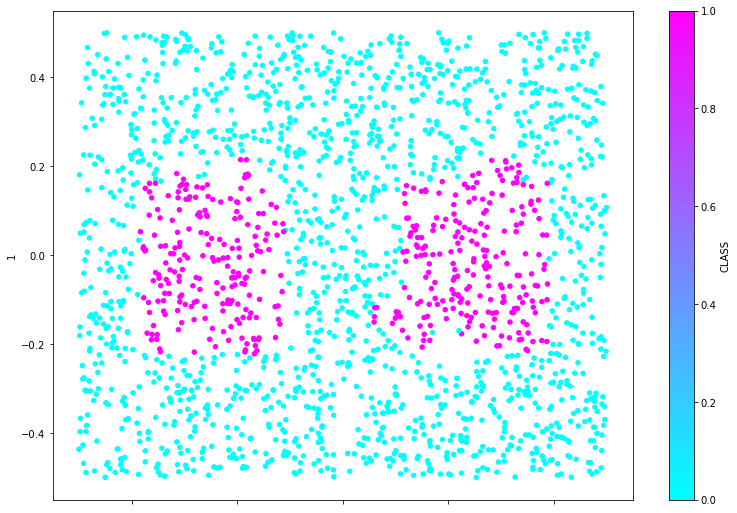

In [94]:
ej4_df_data = read_csv('dos_elipses/dos_elipses.data', names=[0, 1, 'CLASS'])
ej4_df_data = ej4_df_data.sample(500)
ej4_df_test = read_csv('dos_elipses/dos_elipses.test', names=[0, 1, 'CLASS'])

n_bins = range(2, 25)

ej4_clfs = discretizar(ej4_df_data, ej4_df_test.copy(), n_bins)
n_cols = len(ej4_df_test.columns)
elipses_pred = ej4_clfs['best'].predict(ej4_df_test.loc[:, range(n_cols-1)], ej4_df_test.loc[:, 'CLASS'])
ej4_df_test['CLASS'] = elipses_pred
ej4_df_test.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')
print(f"El mejor n_bin es: {ej4_clfs['best'].n_bins}")

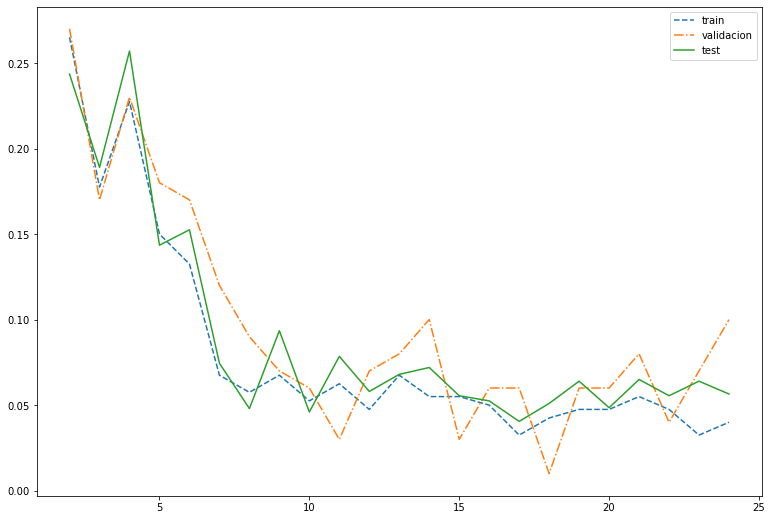

In [95]:
plot_errors(n_bins, ej4_clfs)

# Conclusion
Como podemos ver en el primer grafico como el modelo clasifica de una buena manera a las clases generando los dos elipses del problema. A diferencia del modelo Gaussian NB, este modelo si clasifica las clases con un error aprox de 0.05.

Las curvas de train, validacion y test tienen un comportamiento similar (los picos coinciden) y podemos ver que estan bastante pegadas por lo que no hay indicaciones de sobreajuste. Notemos que no estamos usando el modelo con menor test error ya que estamos usando el error de validacion para quedarnos con el mejor modelo.

Si nosotro extendemos el grafico (por ejemoplo hasta 60 bins) el error de test va a comenzar a aumentar generando sobreajuste. Esto se debe a que, al aumentar el tamaño de los bins, estamos generalizando demasiado ese intervalo y de esta manera aumenta el error de test y se produce sobreeajuste.

El mejor n_bin es: 13


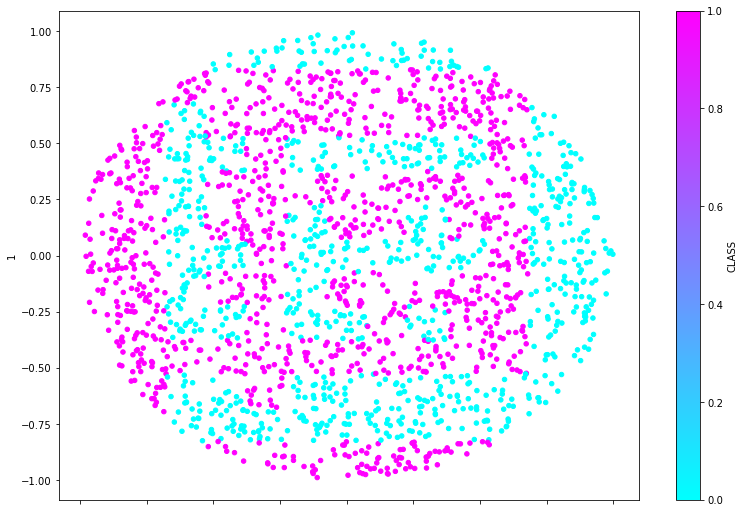

In [106]:
from espirales import generate_spirals_dataframe

ej4_df_data = generate_spirals_dataframe(600, 1)
ej4_df_test = generate_spirals_dataframe(2000, 1)

n_bins = range(2, 25)

ej4_clfs = discretizar(ej4_df_data, ej4_df_test.copy(), n_bins)
n_cols = len(ej4_df_test.columns)
elipses_pred = ej4_clfs['best'].predict(ej4_df_test.loc[:, range(n_cols-1)], ej4_df_test.loc[:, 'CLASS'])
ej4_df_test['CLASS'] = elipses_pred
ej4_df_test.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')
print(f"El mejor n_bin es: {ej4_clfs['best'].n_bins}")

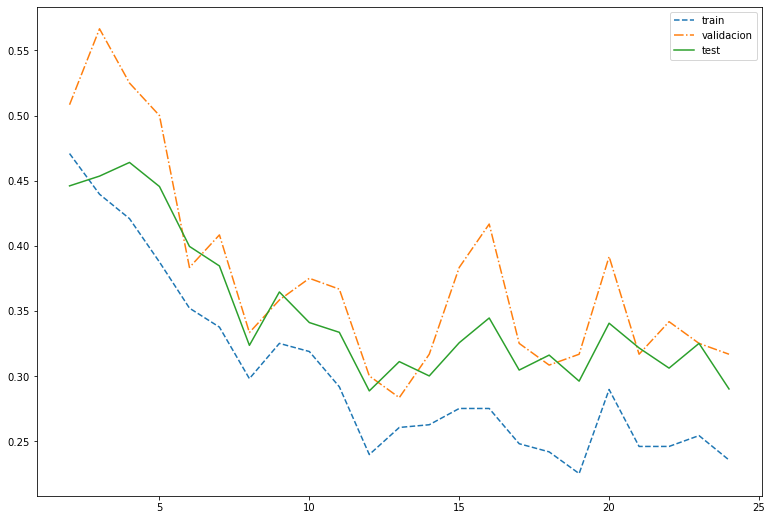

In [107]:
plot_errors(n_bins, ej4_clfs)

In [108]:
ej4_clfs['best'].test_error

0.31100000000000005

# Conclusion

A diferencia al ejercicio anterior, el modelo parece no realizar un buen trabajo. Podemos notar en la grafica como los errores se comportan de forma similar, pero estamos trabajando con un error alto.

Se puede notar un poco de sobreajuste ya que la diferencia de los errores de test y train es alta.

Al igual del caso anterior, si nosotros extendemos la grafica, el error de test aumenta ya que empezamos a generalizar los datos y el modelo pasa a ser peor, por eso los mejores tamaños de bins son valores en el intervalo [10, 25] aprox

# Ejercicio 5

El mejor alpha es 0.1 con una longitud de diccionario de 4000


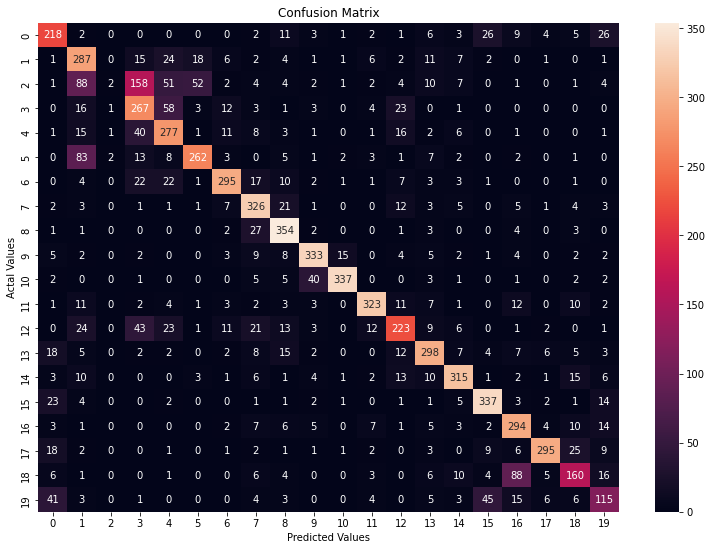

In [14]:
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns

data_x, data_y = fetch_20newsgroups(subset="train",return_X_y=True, remove=["headers"])
_x_train, _x_val, _y_train, _y_val = train_test_split(data_x, data_y,test_size=0.25, random_state=1)
_x_test, _y_test = fetch_20newsgroups(subset="test",return_X_y=True,remove=["headers"])
len_dict = range(1000, 5000, 1000)
alpha_vals = [10**(-i) for i in range(4)]

ej5_clfs: dict[str, MultinomialNaiveBayes] = {'best': None}

for l in len_dict:
    for alpha in alpha_vals:
        clf = MultinomialNaiveBayes(alpha=alpha, len_dict=l)
        clf.train(_x_train, _y_train, _x_val, _y_val)
        clf.predict(_x_test, _y_test)
        
        ej5_clfs[f'{l}-{alpha}'] = clf

        if not ej5_clfs['best'] or clf.val_error < ej5_clfs['best'].val_error:
            ej5_clfs['best'] = clf

print(f"El mejor alpha es {ej5_clfs['best'].alpha} con una longitud de diccionario de {ej5_clfs['best'].len_dict}")

# Matriz de confusión
ej5_pred = ej5_clfs['best'].predict(_x_test, _y_test)
matrix = confusion_matrix(_y_test, ej5_pred)
matrix_df = DataFrame(matrix)
sns.heatmap(matrix_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [111]:
print(f"Train error: {ej5_clfs['best'].train_error}")
print(f"Test error: {ej5_clfs['best'].test_error}")

Train error: 0.1355332940483206
Test error: 0.2939458311205523


# Conclusion
Para poder ver si hay sobreajuste hay que compara los errores de test y train. En este caso no podemos ver visualmente si hay sobreajuste o no como en los otros ejercicios, pero si tomamos los errores del mejor modelo (train: 0.1355332940483206, test: 0.2939458311205523) podemos decir que hay un poco de sobreajuste ya que la diferencia es un poco notable (de .15 aprox).

Luego analizando la matriz podemos ver como el modelo clasifica de forma erronea a la `clase 2` siendo solo 2 buenas predicciones en esta clase. Luego tambien podemos ver que en la `clase 18` no tuvo el mejor resultado, clasificando mal casi 1/4 de los datos. Pero a pesar de esto, el modelo clasifica el resto de las clase bastante bien, esto lo podemos decir ya que en la diagonal encontramos la mayor cantidad de datos clasificado (estos son los True Positive).

De esta forma podemos concluir que este modelo no es bueno para clasificar las clases menos la 2 y 18. Tambien, como el error de test fue de aprox 0.3 no podemos decir que es tan bueno el modelo.

# Ejercicio 6
Por desgracia no pude hacer este ejercicio. No supe como encararlo